# --------------------    Finance Data Project    --------------------
    # This project is challenging as it introduces many new concepts. 
    # You may need to research on your own, but guidance will be provided.


#### This project focuses on exploratory data analysis of "stock prices", 
    # specifically bank stocks, from the 2008 financial crisis to early 2016. 
    # The goal is to practice visualization and pandas skills, 
    # it is not meant to be a robust financial analysis or be taken as financial advice

#### The 2008 financial crisis:
    # The 2008 financial crisis was a major global economic downturn triggered by subprime mortgages, 
    # excessive risk-taking by financial institutions, and regulatory failures. 
    # It led to a stock market crash and an international banking crisis, 

In [2]:
# import libraries
import numpy as np
import pandas as pd

from pandas_datareader import data, wb
import datetime

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

### --------  loading provided "pickle file"   --------
    # loading provided "pickle file" of the "stock data from Jan 1st 2006 to Jan 1st 2016"

In [3]:
# provided data is a "pickle" file so read_csv wont work
# Read in the csv file and as a dataframe
# df = pd.read_csv("./data_all_banks")
df = pd.read_pickle("data_all_banks")  # Load a pickle file into a DataFrame

In [4]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [7]:
# inspect first 5 row
df.head(5)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [8]:
df['BAC']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000
...,...,...,...,...,...
2015-12-24,17.32,17.38,17.22,17.27,29373415
2015-12-28,17.22,17.23,16.98,17.13,41777497
2015-12-29,17.25,17.35,17.16,17.28,45670376


In [9]:
df['C']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.00,493.80,481.10,492.90,1537660
2006-01-04,488.60,491.00,483.50,483.80,1871020
2006-01-05,484.40,487.80,484.00,486.20,1143160
2006-01-06,488.80,489.00,482.00,486.20,1370250
2006-01-09,486.00,487.40,483.00,483.90,1680740
...,...,...,...,...,...
2015-12-24,52.48,52.97,52.45,52.71,4671254
2015-12-28,52.57,52.57,51.96,52.38,8761743
2015-12-29,52.76,53.22,52.74,52.98,10155134


___

## --------  about the Data  --------

In [ ]:
# We need to get data using "pandas datareader". We will get stock information for the following banks:
    # Bank of America
    # CitiGroup
    # Goldman Sachs
    # JPMorgan Chase
    # Morgan Stanley
    # Wells Fargo


# Get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 
    # Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. 

# This will involve a few steps:
    # 1. Use datetime() to set start and end datetime objects.
    # 2. Figure out the ticker symbol for each bank.
    # 2. Figure out how to use datareader to grab info on the stock.
    #    -  Use Google Finance (or Yahoo Finance)

# Use this documentation: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html


# Use Google Finance (or Yahoo Finance) as a source, for example:
    # Bank of America
    # BAC = data.DataReader("BAC", 'google', start, end)


# NOTE: Check the link above for the latest API (or search online for latest API), as 'google' may not always work.
        # Google Finance no longer provides a public API or support in pandas-datareader. 
        # Use Yahoo Finance, Alpha Vantage, or Market Data API for real-time and historical stock data.


### --------  ONLINE: getting data from "yahoo finance"  --------
    # Note: We're not using this. Instead, we're using "yfinance" in a more straightforward way.


In [ ]:
# Note: We're not using this. Instead, we're using "yfinance" in a more straightforward way.
import datetime
import pandas as pd
import pandas_datareader.data as data

# Define start and end dates
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Define bank tickers
# Create a list of the "ticker symbols" (as strings) in alphabetical order. 
    # Call this list: "tickers"
tickers = ['BAC', 'CTG', 'GS', 'JPM', 'MS', 'WFC']

# Fetch data for each bank using "Yahoo Finance" since 
BAC = data.DataReader("BAC", 'yahoo', start, end)       # Bank of America
CTG = data.DataReader("CTG", 'yahoo', start, end)       # CitiGroup
GS = data.DataReader("GS", 'yahoo', start, end)     # Goldman Sachs
JPM = data.DataReader("JPM", 'yahoo', start, end)       # JPMorgan Chase
MS = data.DataReader("MS", 'yahoo', start, end)     # Morgan Stanley
WFC = data.DataReader("WFC", 'yahoo', start, end)       # Wells Fargo

# Fetch data for all banks in a single call
df = data.DataReader(tickers, 'yahoo', start, end)

# Fetcing could also do this for a "Panel Object"
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'yahoo', start, end)

# ----------------    Concatenate dataframes    ----------------
# Concatenate dataframes into a single dataframe:
# Use "pd.concat" to concatenate the bank dataframes together to a single dataframe called bank_stocks
    # Set the keys argument equal to the "tickers" list. 
    # Also pay attention to what axis you concatenate on.
bank_stocks = pd.concat([BAC, CTG, GS, JPM, MS, WFC], axis=1, keys=tickers)

# Set column name levels
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

# Display the head of the dataframe
print(bank_stocks.head())

# Save as a pickle file for efficient storage
import pickle
with open("bank_stocks_yahoo.pkl", 'wb') as f:
    pickle.dump(bank_stocks, f)

## --------  ALTERNATIVE(online): getting data from "yfinance"  --------

In [17]:

# Install yfinance from PYPI using pip
    # pip install yfinance
    # https://yfinance-python.org/
    # https://github.com/ranaroussi/yfinance

# check first: Use "yfinance" Directly Instead of "pandas_datareader"
    # This method bypasses "pandas_datareader" and directly uses "yfinance", which is more reliable.
    # If this works, it means yfinance is functioning properly.
import yfinance as yf
import datetime

# Define start and end dates
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch stock data directly using yfinance
df = yf.download("AAPL", start=start, end=end)

# Display the first few rows
print(df.head())
# ------------------------------------------------

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632530  129.395518  122.742873  128.782649  112117500
2023-01-04  124.907692  127.181260  123.642405  125.431599   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130219  128.792516  123.454587  124.561717   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


### ----------------    now we get our DataSet    ----------------

In [20]:
# ----------------    now we get our DataSet    ----------------
import datetime
import pandas as pd
import yfinance as yf

# Define start and end dates
start = "2006-01-01"
end = "2016-01-01"

# Define bank tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']  # Fixed 'CTG' -> 'C' for CitiGroup

# Fetch data for all banks using yfinance
bank_data = {ticker: yf.download(ticker, start=start, end=end) for ticker in tickers}

# Concatenate dataframes into a single dataframe with MultiIndex
bank_stocks = pd.concat(bank_data, axis=1, keys=tickers)

# Display the first few rows
bank_stocks.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Ticker            BAC        BAC        BAC        BAC       BAC           C   
Date                                                                           
2006-01-03  31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05  30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Ticker               C           C           C        C  ...         MS   
Date                                                     ...              
2006-01-03  324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04  322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05  320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06  321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09  320.397748  317.505364  319.477447  1680740  ...  32.676735   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Ticker             MS         MS         MS       MS        WFC        WFC   
Date                                                                         
2006-01-03  32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04  32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05  32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06  32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09  32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

                                            
Price             Low       Open    Volume  
Ticker            WFC        WFC       WFC  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463180  18.719245  10870000  
2006-01-05  18.430807  18.542652  10158000  
2006-01-06  18.474948  18.589736   8403800  
2006-01-09  18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [21]:
# Note that: we can't set the multi-level index as before because "bank_stocks" has three levels instead of two. 
    # This happens since "yfinance.download()" already returns a "MultiIndex" with Stock Info (Open/Close) and Ticker, 
    # and concatenating adds another level.

# we use following way ----
# Check the number of levels in the MultiIndex
print(bank_stocks.columns.nlevels)  # Should print 3

# Drop the extra level by resetting the column index
bank_stocks.columns = bank_stocks.columns.droplevel(2)  # Drops the repeated ticker level
bank_stocks.head()  # Display the change

3


BAC                                                      C  \
Price           Close       High        Low       Open    Volume       Close   
Date                                                                           
2006-01-03  31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04  30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05  30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06  30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09  30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

                                                         ...         MS  \
Price             High         Low        Open   Volume  ...      Close   
Date                                                     ...              
2006-01-03  324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04  322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05  320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06  321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09  320.397748  317.505364  319.477447  1680740  ...  32.676735   

                                                            WFC             \
Price            High        Low       Open   Volume      Close       High   
Date                                                                         
2006-01-03  32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04  32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05  32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06  32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09  32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

                                            
Price             Low       Open    Volume  
Date                                        
2006-01-03  18.363110  18.601516  11016400  
2006-01-04  18.463180  18.719245  10870000  
2006-01-05  18.430807  18.542652  10158000  
2006-01-06  18.474948  18.589736   8403800  
2006-01-09  18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [22]:
# Now correctly assign MultiIndex column names
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

# Display the fixed columns
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04   30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05   30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06   30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09   30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04   322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05   320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06   321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09   320.397748  317.505364  319.477447  1680740  ...  32.676735   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04   32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05   32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06   32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09   32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.363110  18.601516  11016400  
2006-01-04   18.463180  18.719245  10870000  
2006-01-05   18.430807  18.542652  10158000  
2006-01-06   18.474948  18.589736   8403800  
2006-01-09   18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [23]:
# ----    save as pickle    ----
# to_pickle() comes from "pandas". 
    # It is a method available for pandas "DataFrames" and "Series", 
    # allowing you to serialize and save data in "pickle" format
bank_stocks.to_pickle("bank_stocks_yahoo.pkl")

___

## ----------------    EDA    ----------------
    # EDA stands for Exploratory Data Analysis. 
    # It involves analyzing and visualizing datasets to understand 
        # patterns, trends, and relationships before applying further data processing or modeling.

In [3]:
# ----  load the pickle dataset  ----
df1 = pd.read_pickle("bank_stocks_yahoo.pkl")  # Load a pickle file into a DataFrame

In [ ]:
# data info
df1.info()

In [3]:
# inspect first 5 row
df1.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.173681  31.239895  30.557888  31.067736  16296700  324.013123   
2006-01-04   30.842604  31.279618  30.756524  31.120702  17757900  318.031219   
2006-01-05   30.882324  31.008133  30.670439  30.842597  14970700  319.608795   
2006-01-06   30.835981  31.061110  30.690309  30.988274  12599800  319.608795   
2006-01-09   30.855854  31.100849  30.696941  30.935313  15619400  318.096985   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   324.604743  316.256273  322.106780  1537600  ...  32.190899   
2006-01-04   322.764226  317.834019  321.186564  1870960  ...  32.212990   
2006-01-05   320.660556  318.162594  318.425534  1143160  ...  32.301331   
2006-01-06   321.449397  316.847872  321.317917  1370210  ...  32.334457   
2006-01-09   320.397748  317.505364  319.477447  1680740  ...  32.676735   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   32.290271  31.324157  31.561543  5377000  18.778112  18.822262   
2006-01-04   32.726410  32.212990  32.406214  7977800  18.560308  18.731018   
2006-01-05   32.345497  32.030820  32.323414  5778000  18.539709  18.575028   
2006-01-06   32.489035  32.047383  32.444871  6889800  18.648602  18.704523   
2006-01-09   32.731943  32.362058  32.367580  4144500  18.645660  18.733960   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.363110  18.601516  11016400  
2006-01-04   18.463180  18.719245  10870000  
2006-01-05   18.430807  18.542652  10158000  
2006-01-06   18.474948  18.589736   8403800  
2006-01-09   18.575022  18.645660   5619600  

[5 rows x 30 columns]

In [ ]:
# The DataFrame has a multi-level index:
    # 6 banks at the first level.
    # Each bank has 2517 rows and 5 columns
print("--------    BAC    --------\n", df1['BAC'])
print("--------    C    --------\n", df1['C'])

### ----    cross-section (xs)    ----

In [ ]:
# Check the column index levels
print(df1.columns)  # This will show the structure of the MultiIndex columns

# DataFrame has a two-level MultiIndex for columns:
    # Level 0: Bank Ticker (BAC, C, GS, etc.)
    # Level 1: Stock Info (Close, High, Low, etc.)

In [4]:
# returns cross-section of row(s) or column(s) in multi-indexed dataframe
    # axis=0: Operate on rows (index-wise)
    # axis=1: Operate on columns (column-wise)
close_prices = df1.xs('Close', level="Stock Info", axis=1) # 'Close' valuse for all 6 banks

In [18]:
close_prices

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,31.173681,324.013123,95.293152,24.241705,32.190899,18.778112
2006-01-04,30.842604,318.031219,93.976913,24.101795,32.212990,18.560308
2006-01-05,30.882324,319.608795,93.939949,24.174791,32.301331,18.539709
2006-01-06,30.835981,319.608795,95.270920,24.345125,32.334457,18.648602
2006-01-09,30.855854,318.096985,96.417038,24.740541,32.676735,18.645660
...,...,...,...,...,...,...
2015-12-24,14.103421,40.187347,150.992538,51.625511,24.987909,42.026821
2015-12-28,13.989088,39.935757,150.289108,51.454971,24.749411,41.919491
2015-12-29,14.111586,40.393215,151.869644,51.989849,25.041754,42.387131


In [19]:
# What is the max Close price for each bank's stock throughout the time period?
max_close_prices = close_prices.max()
print(max_close_prices)

Bank Ticker
BAC     37.699574
C      386.292603
GS     186.076126
JPM     53.933903
MS      50.462826
WFC     44.268105
dtype: float64


In [4]:
# in single line
df1.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     37.699574
C      386.292603
GS     186.076126
JPM     53.933903
MS      50.462826
WFC     44.268105
dtype: float64

### ------------    calculate RETURNS    ------------
    # Create a new empty DataFrame called "returns" for daily return percentages for each bank's stock.
    # This dataframe will contain the returns for each bank's stock. 

In [5]:
returns = pd.DataFrame()

# LATEX note: 
    # block level math $$...$$ and \[...\]
    # inline math $...$ and \(...\)

### returns are typically defined by:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$
Where $p_t$ is today's price and $p_{t-1}$ is the previous day's price.

In [6]:
# Use .pct_change() to compute daily returns for each bank's "Close" price.
# Store the results in "returns".
for bank in close_prices.columns:
    returns[bank+' return'] = close_prices[bank].pct_change()

In [7]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013813,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004960,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014168,0.007046,0.001026,0.005873
2006-01-09,0.000644,-0.004730,0.012030,0.016242,0.010586,-0.000158


#### about pct_change(): 
    # It is fractional change between the current and a prior element.
    # Computes the fractional change from the immediately previous row by default. 
    # This is useful in comparing the fraction of change in a time series of elements.

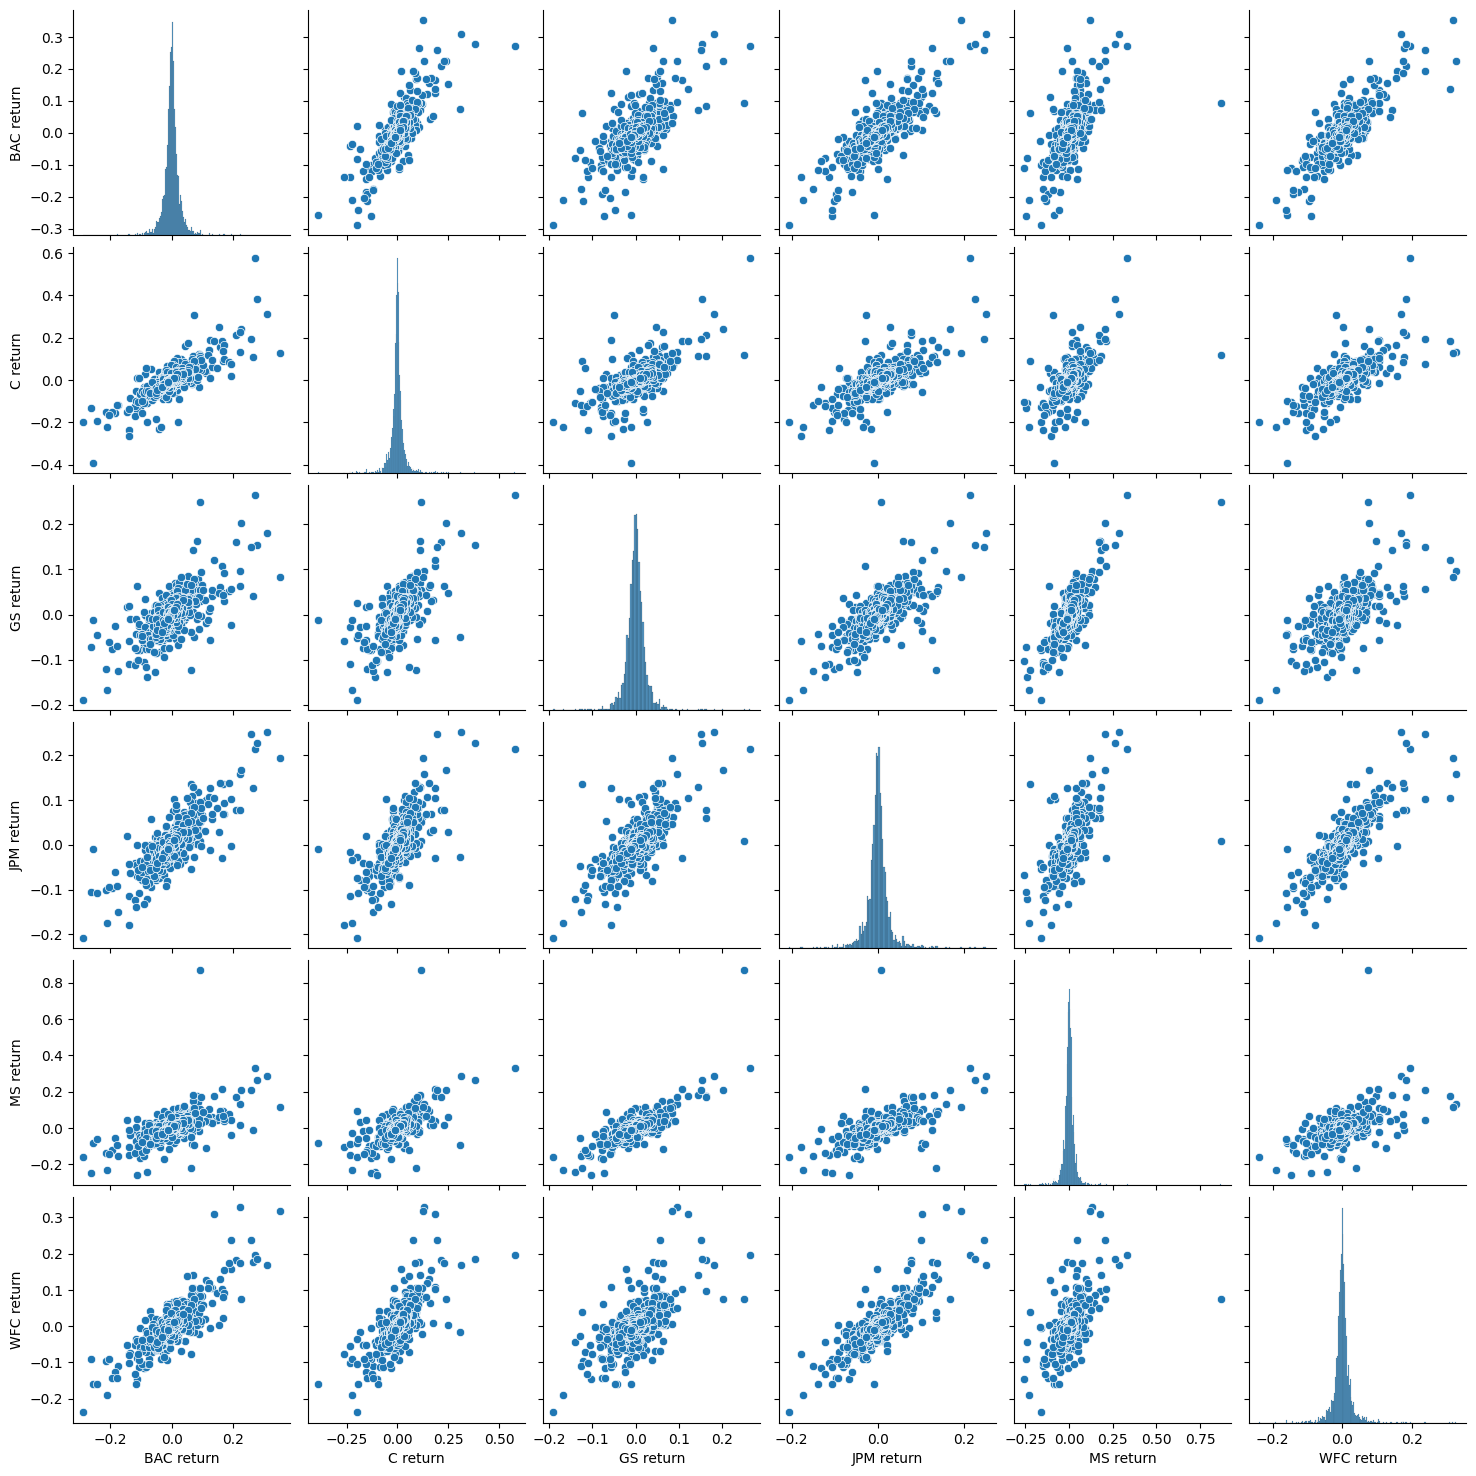

In [7]:
# Create a pairplot using seaborn from "returns" data 
import seaborn as sns
sns.pairplot(returns[1:])

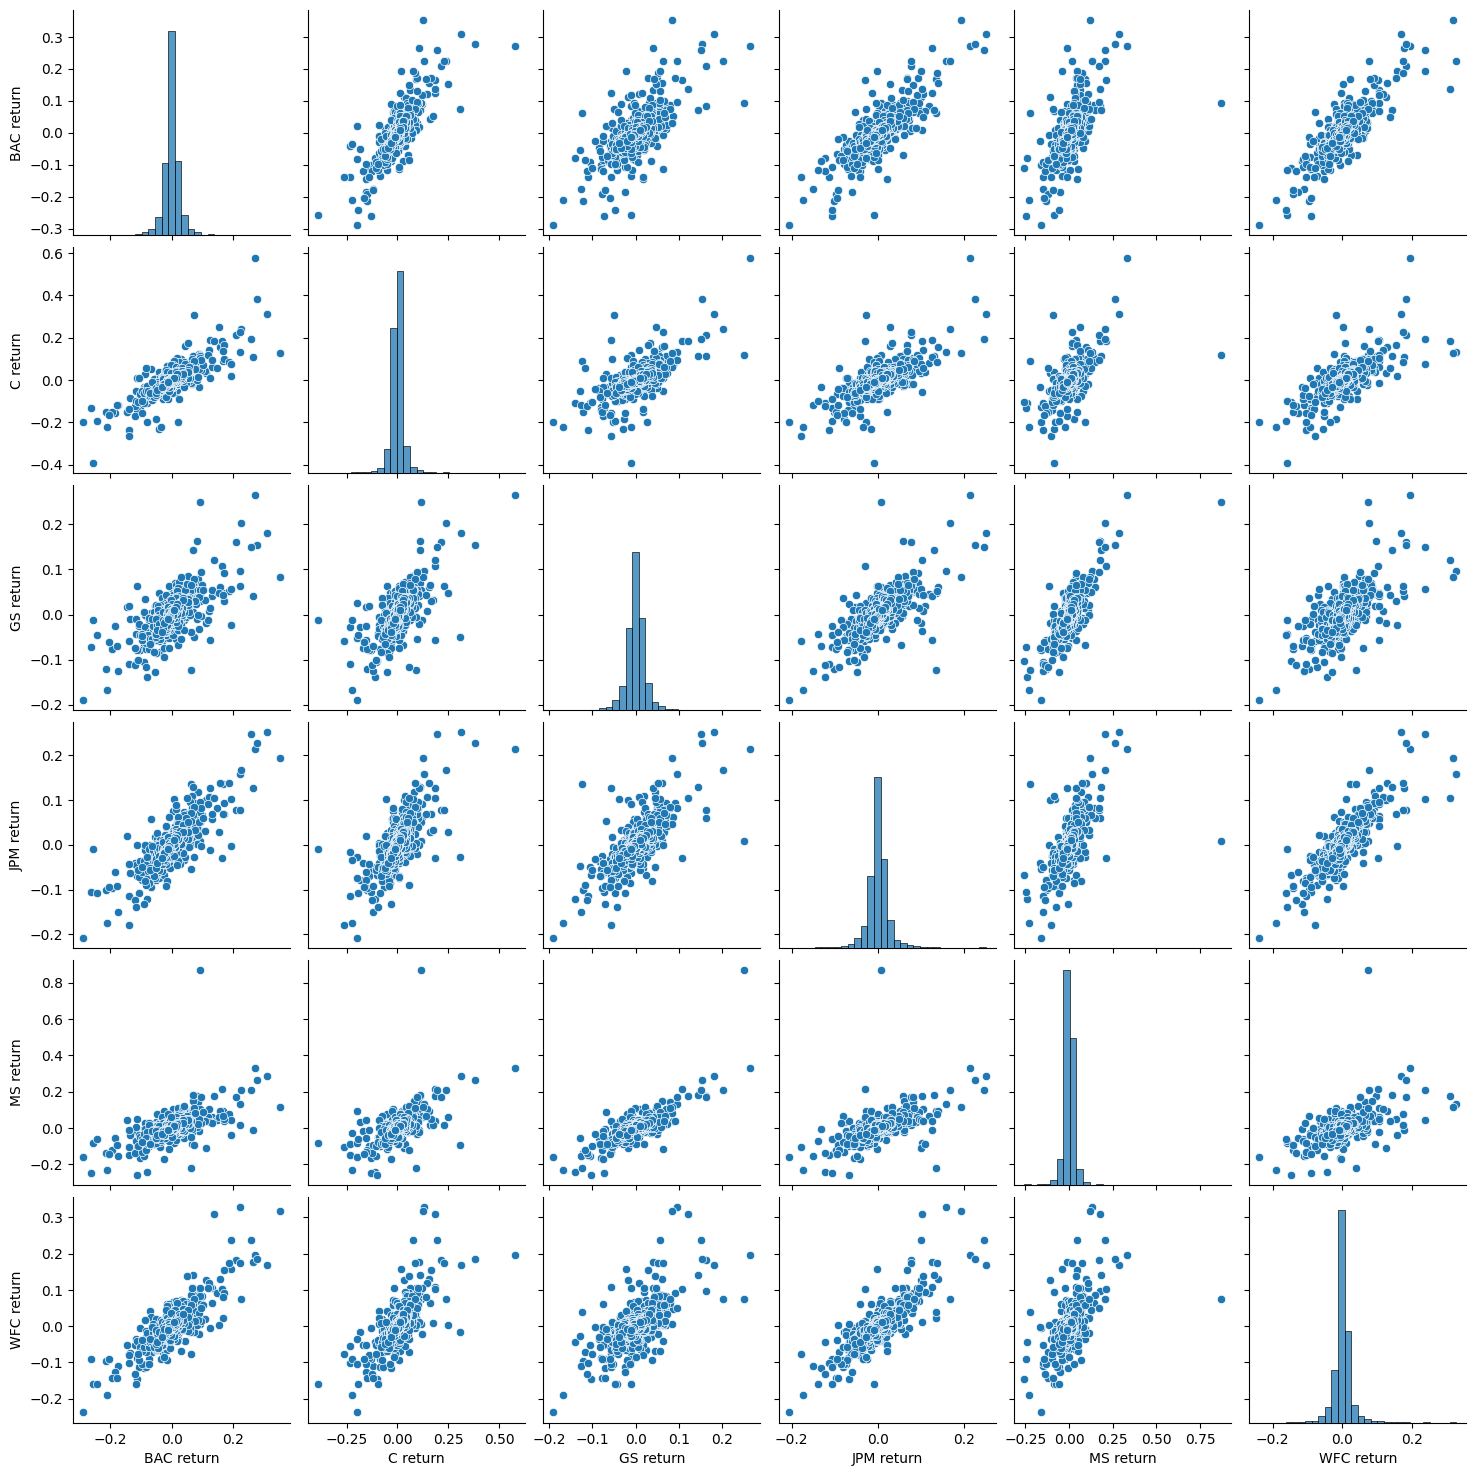

In [8]:
sns.pairplot(returns[1:], diag_kws={'bins': 30})  # Set bins to 30

In [ ]:
# Which stock stands out, and how can we determine why?